<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/TmeSeriesIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Forecasting with the Holt-Winters Method

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


## Train Test Split

In [ ]:
train_data = df.iloc[:108] 
test_data = df.iloc[108:]

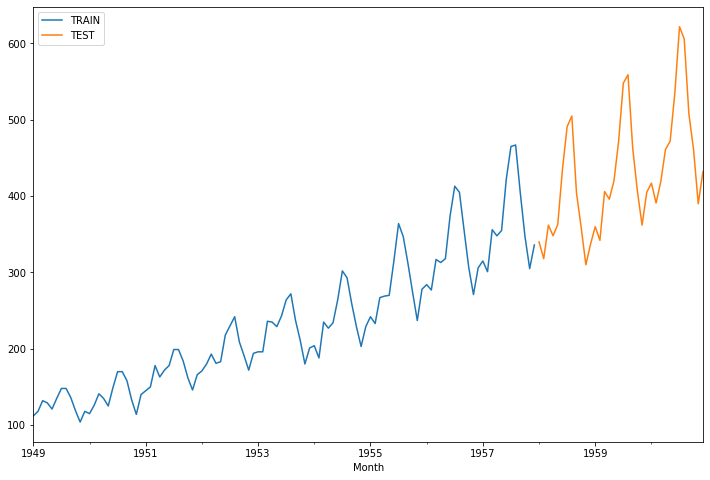

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

## Fitting the Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model = model.fit()

## Evaluating Model against Test Set

In [ ]:
test_predictions = fitted_model.forecast(36)

In [ ]:
test_predictions

1958-01-01    356.739143
1958-02-01    343.561234
1958-03-01    403.996804
1958-04-01    397.853537
1958-05-01    406.415919
1958-06-01    479.824369
1958-07-01    529.820371
1958-08-01    524.772030
1958-09-01    454.714920
1958-10-01    391.965458
1958-11-01    345.259663
1958-12-01    395.243838
1959-01-01    407.506420
1959-02-01    392.453174
1959-03-01    461.489283
1959-04-01    454.471773
1959-05-01    464.252661
1959-06-01    548.107812
1959-07-01    605.218708
1959-08-01    599.451941
1959-09-01    519.425056
1959-10-01    447.745766
1959-11-01    394.393305
1959-12-01    451.490690
1960-01-01    465.498351
1960-02-01    448.302888
1960-03-01    527.163474
1960-04-01    519.147307
1960-05-01    530.320106
1960-06-01    626.108620
1960-07-01    691.346924
1960-08-01    684.759493
1960-09-01    593.344043
1960-10-01    511.464127
1960-11-01    450.519118
1960-12-01    515.741989
Freq: MS, dtype: float64

In [ ]:
#train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
#test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

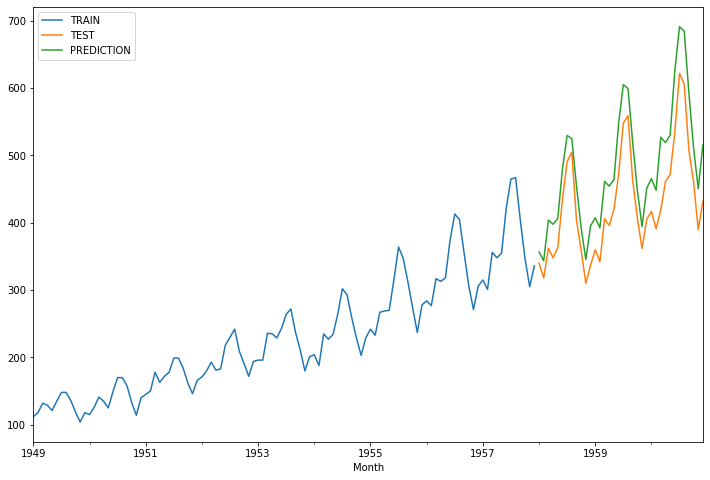

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

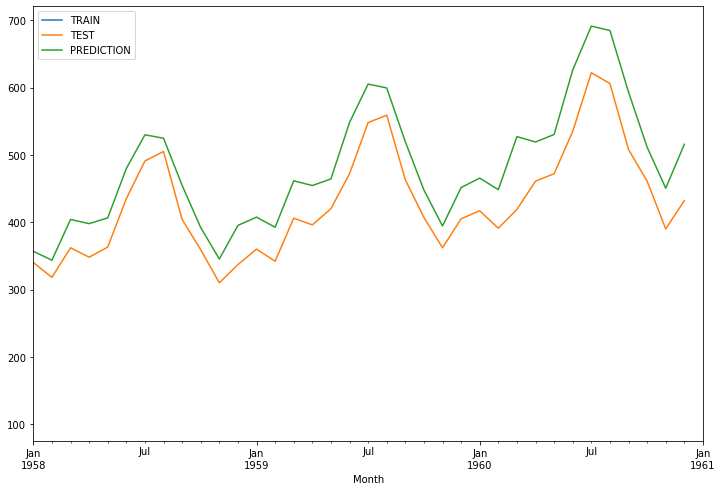

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_data,test_predictions)

3200.583445912333

In [ ]:
np.sqrt(mean_squared_error(test_data,test_predictions))

56.57369924189449

In [ ]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## Forecasting into Future

In [ ]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [ ]:
forecast_predictions = final_model.forecast(36)

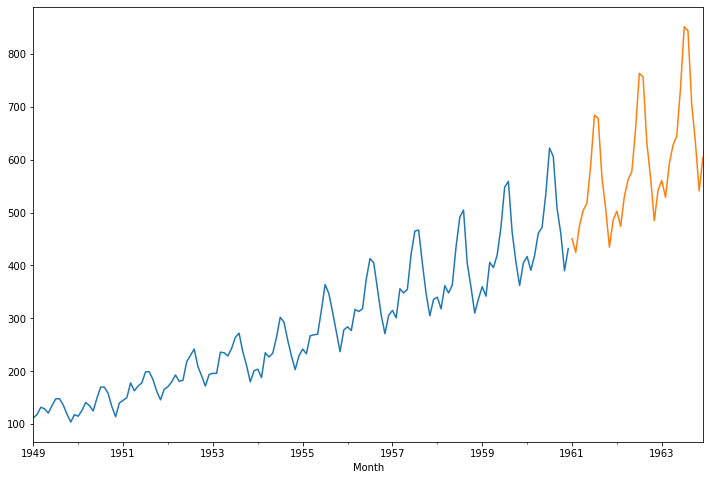

In [ ]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();